# pakage import

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import warnings
import datetime
import scipy
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

warnings.filterwarnings(action = "ignore")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams["axes.unicode_minus"] = False

# 데이터 탐색 및 전처리

In [174]:
defect_1 = pd.read_csv("./data/defect/defect_1.csv",encoding = 'euc-kr')
defect_2 = pd.read_csv("./data/defect/defect_2.csv",encoding = 'euc-kr')
defect_4 = pd.read_csv("./data/defect/defect_4.csv",encoding = 'euc-kr')
defect_5 = pd.read_csv("./data/defect/defect_5.csv",encoding = 'euc-kr')
light_expose_1 = pd.read_csv("./preprocessed/노광1호기130_.csv",index_col = 0)
light_expose_2 = pd.read_csv("./preprocessed/노광2호기131_.csv",index_col = 0)
light_expose_4 = pd.read_csv("./preprocessed/노광4호기132_.csv",index_col = 0)
light_expose_5 = pd.read_csv("./preprocessed/노광5호기133_.csv",index_col = 0)

In [175]:
defect_1.isnull().sum()

일자           0
총 검사 수량     34
총 불량 수량     34
오픈          34
슬릿(상)       45
슬릿(하)       34
쇼트          35
Yield(%)    34
dtype: int64

In [176]:
defect_2.isnull().sum()

일자           0
총 검사 수량     34
총 불량 수량     34
오픈          35
슬릿(상)       62
슬릿(하)       41
쇼트          38
Yield(%)    34
dtype: int64

In [177]:
defect_4.isnull().sum()

일자           0
총 검사 수량     73
총 불량 수량     73
오픈          76
슬릿(상)       98
슬릿(하)       79
쇼트          77
Yield(%)    73
dtype: int64

In [178]:
defect_5.isnull().sum()

일자           0
총 검사 수량     10
총 불량 수량     10
오픈          10
슬릿(상)       11
슬릿(하)       10
쇼트          10
Yield(%)    10
dtype: int64

In [179]:
defect_5.dtypes

일자           object
총 검사 수량     float64
총 불량 수량     float64
오픈          float64
슬릿(상)       float64
슬릿(하)       float64
쇼트          float64
Yield(%)    float64
dtype: object

In [180]:
defect_columns = ["오픈","슬릿(상)","슬릿(하)","쇼트"]

In [181]:
def make_time_col(df):
    splited_list = list(map(lambda x: x.split(),df["일자"]))
    date_list = list(map(lambda x: datetime.datetime(2020,int(x[0][:2]),int(x[1][:2])),splited_list))
    df["일자"] = date_list
    return df

In [182]:
reason_list = ["오픈","슬릿(상)","슬릿(하)","쇼트"]
def preprocess(df):
    df = df.dropna(subset = ["총 검사 수량"])
    df = df.fillna(0)
    for col in reason_list:
        df[col] = df[col] * df["총 검사 수량"] / 1000000
    df["defect_from_light"] = df[reason_list].sum(axis = 1)
    df["pure_yield"] = (1- (df["defect_from_light"]/df["총 검사 수량"]))*100
    return make_time_col(df)

In [183]:
defect_1 = preprocess(defect_1)
defect_2 = preprocess(defect_2)
defect_4 = preprocess(defect_4)
defect_5 = preprocess(defect_5)

In [184]:
defect_1

,일자,총 검사 수량,총 불량 수량,오픈,슬릿(상),슬릿(하),쇼트,Yield(%),defect_from_light,pure_yield
0,2020-04-01,10368.0,65.0,11.000448,0.995328,6.998400,2.001024,99.37,20.995200,99.7975
3,2020-04-04,39636.0,221.0,8.006472,4.003236,12.009708,17.003844,99.44,41.023260,99.8965
21,2020-04-22,10696.0,161.0,10.995488,0.994728,6.995184,4.995032,98.49,23.980432,99.7758
22,2020-04-23,10752.0,160.0,6.999552,0.000000,14.999040,20.998656,98.51,42.997248,99.6001
23,2020-04-24,16128.0,285.0,6.999552,5.999616,6.999552,15.998976,98.23,35.997696,99.7768
...,...,...,...,...,...,...,...,...,...,...
140,2020-08-19,21224.0,1279.0,17.000424,40.007240,33.003320,60.000248,93.97,150.011232,99.2932
141,2020-08-20,62976.0,1220.0,56.993280,73.996800,55.985664,46.980096,98.06,233.955840,99.6285
142,2020-08-21,69840.0,1170.0,40.996080,16.971120,44.976960,91.001520,98.32,193.945680,99.7223
143,2020-08-22,36032.0,725.0,31.996416,6.990208,19.997760,43.995072,97.99,102.979456,99.7142


In [185]:
print(defect_1["defect_from_light"].sum())
print(defect_1["총 검사 수량"].sum())
print(1-defect_1["defect_from_light"].sum()/defect_1["총 검사 수량"].sum(),"%")

13292.682057
5213464.0
0.9974503167074713 %


# 모수추정

## 각 노광기의 모부적합품률 추정

점추정
$$ \hat{P}4(모부적합품률 점추정치) = {x \over n} = {부적합품 수 \over 시료 수} = \hat p $$ 
구간추정
$$ \hat{P}_{U \bullet L} = \hat{p} \pm u_{1-\alpha /2}\sqrt{{\hat{p}(1-\hat{p})} \over n}$$

* 1호기
    * $P_0 \le 0.5, nP_0 \ge 5, n(1-P_0) \ge 5$이므로 정규분포에 근사한다고 가정

In [186]:
defect_1.head()

,일자,총 검사 수량,총 불량 수량,오픈,슬릿(상),슬릿(하),쇼트,Yield(%),defect_from_light,pure_yield
0,2020-04-01,10368.0,65.0,11.000448,0.995328,6.998400,2.001024,99.37,20.995200,99.7975
3,2020-04-04,39636.0,221.0,8.006472,4.003236,12.009708,17.003844,99.44,41.023260,99.8965
21,2020-04-22,10696.0,161.0,10.995488,0.994728,6.995184,4.995032,98.49,23.980432,99.7758
22,2020-04-23,10752.0,160.0,6.999552,0.000000,14.999040,20.998656,98.51,42.997248,99.6001
23,2020-04-24,16128.0,285.0,6.999552,5.999616,6.999552,15.998976,98.23,35.997696,99.7768


In [187]:
def get_phat_interval(df, confidence = 0.95):
    n = df["총 검사 수량"].sum()
    phat = df["defect_from_light"].sum()/df["총 검사 수량"].sum()
    se = np.sqrt(phat*(1-phat)/n)
    h = se * scipy.stats.norm.ppf((1+confidence)/2)
    return phat,phat-h,phat+h

In [188]:
d1_phat = get_phat_interval(defect_1)
d2_phat = get_phat_interval(defect_2)
d4_phat = get_phat_interval(defect_4)
d5_phat = get_phat_interval(defect_5)

In [189]:
print("-"*25, "1호기","-"*25)
print("점 추정치 :",d1_phat[0],"\n95% 구간 추정치 :",[d1_phat[1],d1_phat[2]])
print("-"*25, "2호기","-"*25)
print("점 추정치 :",d2_phat[0],"\n95% 구간 추정치 :",[d2_phat[1],d2_phat[2]])
print("-"*25, "4호기","-"*25)
print("점 추정치 :",d4_phat[0],"\n95% 구간 추정치 :",[d4_phat[1],d4_phat[2]])
print("-"*25, "5호기","-"*25)
print("점 추정치 :",d5_phat[0],"\n95% 구간 추정치 :",[d5_phat[1],d5_phat[2]])

------------------------- 1호기 -------------------------
점 추정치 : 0.0025496832925287296 
95% 구간 추정치 : [0.002506394680928092, 0.002592971904129367]
------------------------- 2호기 -------------------------
점 추정치 : 0.0026905042238835617 
95% 구간 추정치 : [0.0026427050925732403, 0.002738303355193883]
------------------------- 4호기 -------------------------
점 추정치 : 0.002398910730547619 
95% 구간 추정치 : [0.0023214975148130117, 0.0024763239462822265]
------------------------- 5호기 -------------------------
점 추정치 : 0.0028623271252627806 
95% 구간 추정치 : [0.002838657328225425, 0.002885996922300136]


## 노광기 별 모부적합품률 차 검정

In [190]:
def get_u0(df1,df2,mach_lst,defect_factor = "defect_from_light"):
    x_A,x_B = df1[defect_factor].sum(), df2[defect_factor].sum()
    n_A,n_B = df1["총 검사 수량"].sum(), df2["총 검사 수량"].sum()
    pA_hat = x_A/n_A
    pB_hat = x_B/n_B
    p_hat = (x_A+x_B)/(n_A+n_B)
    u_0 = (pA_hat - pB_hat)/np.sqrt(p_hat*(1-p_hat)*(1/n_A+1/n_B))
    
    print("-"*10,mach_lst[0],"-"*10)    
    print(mach_lst[0],"검사 수량 :",n_A)
    print(mach_lst[0],defect_factor,"발생 불량 수량 :",x_A,end = "\n\n")
    print("pA hat: ",pA_hat)
    
    print("-"*10,mach_lst[1],"-"*10)    
    print(mach_lst[1],"검사 수량  :",n_B)
    print(mach_lst[1],defect_factor,"발생 불량 수량 :",x_B,end = "\n\n")
    print("pB hat: ",pB_hat)
    print("-"*31)
    
    print("p hat :",p_hat)
    print("검정통계량 u0 :",u_0)
    return u_0

In [191]:
defect_1["mach_num"] = "1"
defect_2["mach_num"] = "2"
defect_4["mach_num"] = "4"
defect_5["mach_num"] = "5"

In [192]:
defect_concat = pd.concat([defect_1,defect_2,defect_4,defect_5],axis = 0)
defect_concat

,일자,총 검사 수량,총 불량 수량,오픈,슬릿(상),슬릿(하),쇼트,Yield(%),defect_from_light,pure_yield,mach_num
0,2020-04-01,10368.0,65.0,11.000448,0.995328,6.998400,2.001024,99.37,20.995200,99.7975,1
3,2020-04-04,39636.0,221.0,8.006472,4.003236,12.009708,17.003844,99.44,41.023260,99.8965,1
21,2020-04-22,10696.0,161.0,10.995488,0.994728,6.995184,4.995032,98.49,23.980432,99.7758,1
22,2020-04-23,10752.0,160.0,6.999552,0.000000,14.999040,20.998656,98.51,42.997248,99.6001,1
23,2020-04-24,16128.0,285.0,6.999552,5.999616,6.999552,15.998976,98.23,35.997696,99.7768,1
...,...,...,...,...,...,...,...,...,...,...,...
140,2020-08-19,183118.0,2051.0,212.966234,13.001378,91.009646,97.968130,98.88,414.945388,99.7734,5
141,2020-08-20,275786.0,3003.0,233.039170,41.092114,156.922234,140.099288,98.91,571.152806,99.7929,5
142,2020-08-21,122976.0,1541.0,152.982144,22.996512,80.057376,133.060032,98.75,389.096064,99.6836,5
143,2020-08-22,91380.0,2285.0,107.005980,28.967460,51.995220,165.032280,97.50,353.000940,99.6137,5


#### 1호기 vs 2호기
1. 가설
    * $P_A$ : 집단 A의 모부적합품률  
    $P_B$ : 집단 B의 모부적합품률  
     
$ H_0 : P_A \ge P_B$ (집단 A의 모부적합품률보다 집단 B의 모부적합품률이 크다)  
$ H_1 : P_A < P_B$ (집단 A의 모부적합품률보다 집단 B의 모부적합품률이 작다)

### 전체 부적합품률

#### 1호기 vs 2호기
1. 가설
    * $P_A$ : 1호기의 모부적합품률   
    $P_B$ : 2호기의 모부적합품률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

$$\hat{p_A} = {x_A \over n_A}$$  
$$\hat{p_B} = {x_B \over n_B}$$

$$\hat{p} = {x_A + x_B \over n_A + n_B}$$

$x_A$ = A집단의 부적합품 수    
$n_A$ = A집단의 총 검사 수량  
  
$x_B$= B집단의 부적합품 수  
$n_B$ = B집단의 총 검사 수량

In [193]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst)

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 defect_from_light 발생 불량 수량 : 13292.682057

pA hat:  0.0025496832925287296
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 defect_from_light 발생 불량 수량 : 12138.177520000001

pB hat:  0.0026905042238835617
-------------------------------
p hat : 0.0026150113210841558
검정통계량 u0 : -4.288232968538851


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [194]:
print("u0 : ",u_0)

u0 :  -4.288232968538851


4. 판정 : 
$$u_0 = -4.2882 < -1.96$$으로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1호기의 모부적합품률과 노광 2호기의 모부적합품률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1호기의 모부적합품률   
    $P_B$ : 2호기의 모부적합품률  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [195]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst)

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 defect_from_light 발생 불량 수량 : 13292.682057

pA hat:  0.0025496832925287296
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 defect_from_light 발생 불량 수량 : 12138.177520000001

pB hat:  0.0026905042238835617
-------------------------------
p hat : 0.0026150113210841558
검정통계량 u0 : -4.288232968538851


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [196]:
print("u0 : ",u_0)

u0 :  -4.288232968538851


4. 판정 : 
$$u_0 = -4.28823 < -1.645$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1호기의 모부적합품률이 노광 2호기의 모부적합품률보다 작다고 할 수 있다.

#### 4호기 vs 5호기 (연식에 의한 차이)
1. 가설
    * $P_A$ : 4호기의 모부적합품률   
    $P_B$ : 5호기의 모부적합품률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [197]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst)

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 defect_from_light 발생 불량 수량 : 3680.027416

pA hat:  0.002398910730547619
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 defect_from_light 발생 불량 수량 : 56014.539664

pB hat:  0.0028623271252627806
-------------------------------
p hat : 0.0028286409749303213
검정통계량 u0 : -10.407066476212044


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [198]:
print("u0 : ",u_0)

u0 :  -10.407066476212044


4. 판정 : 
$$u_0 = -10.40707 < -1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 4호기의 모부적합품률과 노광 5호기의 모부적합품률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 4호기의 모부적합품률   
    $P_B$ : 5호기의 모부적합품률  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : 위와 동일

In [199]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst)

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 defect_from_light 발생 불량 수량 : 3680.027416

pA hat:  0.002398910730547619
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 defect_from_light 발생 불량 수량 : 56014.539664

pB hat:  0.0028623271252627806
-------------------------------
p hat : 0.0028286409749303213
검정통계량 u0 : -10.407066476212044


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [200]:
print("u0 : ",u_0)

u0 :  -10.407066476212044


4. 판정 : 
$$u_0 = −10.40707 < -1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 4호기의 모부적합품률이 노광 5호기의 모부적합품률보다 작다고 할 수 있다.

##### 4호기(5년)의 부적합품률 < 5호기(2년)의 부적합품률
***현재 데이터로는 연식이 오래 될 수록 부적합품률이 높아 지는 것으로 보이지 않고 오히려 반대의 경향을 보인다.***

#### 1,2호기 vs 4,5호기 (기기 작동방식에 따른 차이)
1. 가설
    * $P_A$ : 1,2호기의 모부적합품률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 모부적합품률 -> 디지털 방식  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

In [201]:
defect_A = pd.concat([defect_1,defect_2],axis = 0)
defect_B = pd.concat([defect_4,defect_5],axis = 0)

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [202]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst)

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 defect_from_light 발생 불량 수량 : 25430.859577000003

pA hat:  0.0026150113210841558
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 defect_from_light 발생 불량 수량 : 59694.56707999999

pB hat:  0.002828640974930321
-------------------------------
p hat : 0.002761250955631323
검정통계량 u0 : -10.503995715452623


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [203]:
print("u0 : ",u_0)

u0 :  -10.503995715452623


4. 판정 : 
$$u_0 = -10.504 < -1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1,2호기의 부적합품률과 노광 4,5호기의 부적합품률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1,2호기의 모부적합품률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 모부적합품률 -> 디지털 방식  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : 위와 동일

In [204]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst)

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 defect_from_light 발생 불량 수량 : 25430.859577000003

pA hat:  0.0026150113210841558
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 defect_from_light 발생 불량 수량 : 59694.56707999999

pB hat:  0.002828640974930321
-------------------------------
p hat : 0.002761250955631323
검정통계량 u0 : -10.503995715452623


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [205]:
print("u0 : ",u_0)

u0 :  -10.503995715452623


4. 판정 : 
$$u_0 = -10.504 < -1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 1,2호기의 모부적합품률이 노광 4,5호기의 부적합품률보다 작다고 할 수 있다.

##### 1,2호기(아날로그)의 부적합품률 < 4,5호기(디지털)의 부적합품률
***현재 데이터로는 아날로그 방식의 노광기보다 디지털 방식의 노광기가 부적합품을 더 많이 생산하는 것으로 보임***

### 불량사유가 '오픈'인 부적합품률

#### 1호기 vs 2호기
1. 가설
    * $P_A$ : 1호기의 오픈발생률   
    $P_B$ : 2호기의 오픈발생률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [206]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst,"오픈")

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 오픈 발생 불량 수량 : 4241.131004

pA hat:  0.0008134957878293587
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 오픈 발생 불량 수량 : 4041.200516

pB hat:  0.000895757789004426
-------------------------------
p hat : 0.0008516578302905762
검정통계량 u0 : -4.38562073916465


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [207]:
print("u0 : ",u_0)

u0 :  -4.38562073916465


4. 판정 : 
$$u_0 = -4.38562 < -1.96$$으로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1호기의 오픈발생률과 노광 2호기의 오픈발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1호기의 오픈발생률   
    $P_B$ : 2호기의 오픈발생률  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [208]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst,"오픈")

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 오픈 발생 불량 수량 : 4241.131004

pA hat:  0.0008134957878293587
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 오픈 발생 불량 수량 : 4041.200516

pB hat:  0.000895757789004426
-------------------------------
p hat : 0.0008516578302905762
검정통계량 u0 : -4.38562073916465


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [209]:
print("u0 : ",u_0)

u0 :  -4.38562073916465


4. 판정 : 
$$u_0 = -58.13667 < -1.645$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1호기의 오픈발생률이 노광 2호기의 오픈발생률보다 작다고 할 수 있다.

#### 4호기 vs 5호기 (연식에 의한 차이)
1. 가설
    * $P_A$ : 4호기의 오픈발생률   
    $P_B$ : 5호기의 오픈발생률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [210]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst,"오픈")

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 오픈 발생 불량 수량 : 1281.902795

pA hat:  0.0008356378969010607
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 오픈 발생 불량 수량 : 20442.467485

pB hat:  0.0010446043034648674
-------------------------------
p hat : 0.0010294143493194841
검정통계량 u0 : -7.772053150691969


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [211]:
print("u0 : ",u_0)

u0 :  -7.772053150691969


4. 판정 : 
$$u_0 = -7.772 < -1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 4호기의 오픈발생률과 노광 5호기의 오픈발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 4호기의 오픈발생률   
    $P_B$ : 5호기의 오픈발생률  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : 위와 동일

In [212]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst,"오픈")

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 오픈 발생 불량 수량 : 1281.902795

pA hat:  0.0008356378969010607
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 오픈 발생 불량 수량 : 20442.467485

pB hat:  0.0010446043034648674
-------------------------------
p hat : 0.0010294143493194841
검정통계량 u0 : -7.772053150691969


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [213]:
print("u0 : ",u_0)

u0 :  -7.772053150691969


4. 판정 : 
$$u_0 = -7.772 < -1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 4호기의 오픈발생률이 노광 5호기의 오픈발생률보다 작다고 할 수 있다.

##### 4호기(5년)의 부적합품률 < 5호기(2년)의 부적합품률
***현재 데이터로는 연식이 오래 될 수록 오픈 발생률이 높아 지는 것으로 보이지 않는다.***

#### 1,2호기 vs 4,5호기 (기기 작동방식에 따른 차이)
1. 가설
    * $P_A$ : 1,2호기의 오픈발생률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 오픈발생률 -> 디지털 방식  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

In [214]:
defect_A = pd.concat([defect_1,defect_2],axis = 0)
defect_B = pd.concat([defect_4,defect_5],axis = 0)

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [215]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst,"오픈")

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 오픈 발생 불량 수량 : 8282.33152

pA hat:  0.0008516578302905762
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 오픈 발생 불량 수량 : 21724.370280000003

pB hat:  0.0010294143493194841
-------------------------------
p hat : 0.0009733406019149833
검정통계량 u0 : -14.70788039612484


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [216]:
print("u0 : ",u_0)

u0 :  -14.70788039612484


4. 판정 : 
$$u_0 = -14.70788 < -1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1,2호기의 오픈발생률과 노광 4,5호기의 오픈발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1,2호기의 오픈발생률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 오픈발생률 -> 디지털 방식  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : 위와 동일

In [217]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst,"오픈")

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 오픈 발생 불량 수량 : 8282.33152

pA hat:  0.0008516578302905762
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 오픈 발생 불량 수량 : 21724.370280000003

pB hat:  0.0010294143493194841
-------------------------------
p hat : 0.0009733406019149833
검정통계량 u0 : -14.70788039612484


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [218]:
print("u0 : ",u_0)

u0 :  -14.70788039612484


4. 판정 : 
$$u_0 = -14.70788 < -1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 1,2호기의 오픈발생률이 노광 4,5호기의 오픈발생률보다 작다고 할 수 있다.

##### 1,2호기(아날로그)의 부적합품률 < 4,5호기(디지털)의 부적합품률
***현재 데이터로는 아날로그 방식의 노광기보다 디지털 방식의 노광기가 부적합 원인이 오픈인 부적합품을 더 많이 생산하는 것으로 보임***

### 불량사유가 '슬릿(상)'인 부적합품률

#### 1호기 vs 2호기
1. 가설
    * $P_A$ : 1호기의 슬릿(상)발생률   
    $P_B$ : 2호기의 슬릿(상)발생률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [219]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst,"슬릿(상)")

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 슬릿(상) 발생 불량 수량 : 1436.0469579999997

pA hat:  0.0002754496737677674
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 슬릿(상) 발생 불량 수량 : 945.9827479999999

pB hat:  0.0002096830908117233
-------------------------------
p hat : 0.0002449399962076933
검정통계량 u0 : 6.53593882234717


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [220]:
print("u0 : ",u_0)

u0 :  6.53593882234717


4. 판정 : 
$$u_0 = 4.38562 > 1.96$$으로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1호기의 슬릿(상)발생률과 노광 2호기의 슬릿(상)발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1호기의 슬릿(상)발생률   
    $P_B$ : 2호기의 슬릿(상)발생률  
$$ H_0 : P_A \le P_B$$
$$ H_1 : P_A > P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [221]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst,"슬릿(상)")

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 슬릿(상) 발생 불량 수량 : 1436.0469579999997

pA hat:  0.0002754496737677674
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 슬릿(상) 발생 불량 수량 : 945.9827479999999

pB hat:  0.0002096830908117233
-------------------------------
p hat : 0.0002449399962076933
검정통계량 u0 : 6.53593882234717


3. 기각역 : $$u_0 > u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 > 1.645$$ 이면 $H_0$ 기각

In [222]:
print("u0 : ",u_0)

u0 :  6.53593882234717


4. 판정 : 
$$u_0 = 6.5359 > 1.645$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1호기의 슬릿(상)발생률이 노광 2호기의 슬릿(상)발생률보다 크다고 할 수 있다.

#### 4호기 vs 5호기 (연식에 의한 차이)
1. 가설
    * $P_A$ : 4호기의 슬릿(상)발생률   
    $P_B$ : 5호기의 슬릿(상)발생률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [223]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst,"슬릿(상)")

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 슬릿(상) 발생 불량 수량 : 222.063354

pA hat:  0.00014475711796490447
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 슬릿(상) 발생 불량 수량 : 4476.895627999999

pB hat:  0.00022876809967306398
-------------------------------
p hat : 0.00022266126661391422
검정통계량 u0 : -6.715723767697492


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [224]:
print("u0 : ",u_0)

u0 :  -6.715723767697492


4. 판정 : 
$$u_0 = -6.71572 < -1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 4호기의 슬릿(상)발생률과 노광 5호기의 슬릿(상)발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 4호기의 슬릿(상)발생률   
    $P_B$ : 5호기의 슬릿(상)발생률  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : 위와 동일

In [225]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst,"슬릿(상)")

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 슬릿(상) 발생 불량 수량 : 222.063354

pA hat:  0.00014475711796490447
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 슬릿(상) 발생 불량 수량 : 4476.895627999999

pB hat:  0.00022876809967306398
-------------------------------
p hat : 0.00022266126661391422
검정통계량 u0 : -6.715723767697492


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [226]:
print("u0 : ",u_0)

u0 :  -6.715723767697492


4. 판정 : 
$$u_0 = -6.7157 < -1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 4호기의 슬릿(상)발생률이 노광 5호기의 슬릿(상)발생률보다 작다고 할 수 있다.

##### 4호기(5년)의 부적합품률 < 5호기(2년)의 부적합품률
***현재 데이터로는 연식이 오래 될 수록 슬릿(상)발생률이 높아 지는 것으로 보이지 않는다.***

#### 1,2호기 vs 4,5호기 (기기 작동방식에 따른 차이)
1. 가설
    * $P_A$ : 1,2호기의 슬릿(상)발생률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 슬릿(상)발생률 -> 디지털 방식  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

In [227]:
defect_A = pd.concat([defect_1,defect_2],axis = 0)
defect_B = pd.concat([defect_4,defect_5],axis = 0)

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [228]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst,"슬릿(상)")

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 슬릿(상) 발생 불량 수량 : 2382.029706

pA hat:  0.00024493999620769333
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 슬릿(상) 발생 불량 수량 : 4698.958982

pB hat:  0.00022266126661391427
-------------------------------
p hat : 0.00022968914869981168
검정통계량 u0 : 3.793285899966636


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [229]:
print("u0 : ",u_0)

u0 :  3.793285899966636


4. 판정 : 
$$u_0 = 3.793286> 1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1,2호기의 슬릿(상)발생률과 노광 4,5호기의 슬릿(상)발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1,2호기의 슬릿(상)발생률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 슬릿(상)발생률 -> 디지털 방식  
$$ H_0 : P_A \le P_B$$
$$ H_1 : P_A > P_B$$

2. 통계량 : 위와 동일

In [230]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst,"슬릿(상)")

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 슬릿(상) 발생 불량 수량 : 2382.029706

pA hat:  0.00024493999620769333
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 슬릿(상) 발생 불량 수량 : 4698.958982

pB hat:  0.00022266126661391427
-------------------------------
p hat : 0.00022968914869981168
검정통계량 u0 : 3.793285899966636


3. 기각역 : $$u_0 > u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 > 1.645$$ 이면 $H_0$ 기각

In [231]:
print("u0 : ",u_0)

u0 :  3.793285899966636


4. 판정 : 
$$u_0 = 3.793286 > 1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 1,2호기의 슬릿(상)발생률이 노광 4,5호기의 슬릿(상)발생률보다 크다고 할 수 있다.

##### 1,2호기(아날로그)의 부적합품률 < 4,5호기(디지털)의 부적합품률
***현재 데이터로는 아날로그 방식의 노광기가 디지털 방식의 노광기보다 부적합 원인이 슬릿(상)인 부적합품을 더 많이 생산하는 것으로 보임***

### 불량사유가 '슬릿(하)'인 부적합품률

#### 1호기 vs 2호기
1. 가설
    * $P_A$ : 1호기의 슬릿(하)발생률   
    $P_B$ : 2호기의 슬릿(하)발생률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [232]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst,"슬릿(하)")

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 슬릿(하) 발생 불량 수량 : 2581.048841

pA hat:  0.0004950736863244859
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 슬릿(하) 발생 불량 수량 : 2774.084157999999

pB hat:  0.0006148933917146625
-------------------------------
p hat : 0.000550659067417505
검정통계량 u0 : -7.943022934907598


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [233]:
print("u0 : ",u_0)

u0 :  -7.943022934907598


4. 판정 : 
$$u_0 = -7.94302 < -1.96$$으로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1호기의 슬릿(하)발생률과 노광 2호기의 슬릿(하)발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1호기의 슬릿(하)발생률   
    $P_B$ : 2호기의 슬릿(하)발생률  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [234]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst,"슬릿(하)")

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 슬릿(하) 발생 불량 수량 : 2581.048841

pA hat:  0.0004950736863244859
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 슬릿(하) 발생 불량 수량 : 2774.084157999999

pB hat:  0.0006148933917146625
-------------------------------
p hat : 0.000550659067417505
검정통계량 u0 : -7.943022934907598


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [235]:
print("u0 : ",u_0)

u0 :  -7.943022934907598


4. 판정 : 
$$u_0 = -7.94302 < -1.645$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1호기의 슬릿(하)발생률이 노광 2호기의 슬릿(하)발생률보다 작다고 할 수 있다.

#### 4호기 vs 5호기 (연식에 의한 차이)
1. 가설
    * $P_A$ : 4호기의 슬릿(하)발생률   
    $P_B$ : 5호기의 슬릿(하)발생률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [236]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst,"슬릿(하)")

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 슬릿(하) 발생 불량 수량 : 1015.01794

pA hat:  0.0006616628499499036
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 슬릿(하) 발생 불량 수량 : 12629.612895999999

pB hat:  0.0006453696449285063
-------------------------------
p hat : 0.0006465540125080904
검정통계량 u0 : 0.7644961562587734


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [237]:
print("u0 : ",u_0)

u0 :  0.7644961562587734


4. 판정 : 
$$-1.96 < u_0 = 0.764496 < 1.96$$로 $H_0$ 채택.  
따라서 ***유의수준 0.05***에서 $H_0$채택, 노광 4호기의 슬릿(하)발생률과 노광 5호기의 슬릿(하)발생률은 같다고 할 수 있다.

##### 4호기(5년)의 부적합품률 = 5호기(2년)의 부적합품률
***현재 데이터로는 연식에 상관없이 슬릿(하)발생률은 같은 것으로 보인다.***

#### 1,2호기 vs 4,5호기 (기기 작동방식에 따른 차이)
1. 가설
    * $P_A$ : 1,2호기의 슬릿(하)발생률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 슬릿(하)발생률 -> 디지털 방식  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

In [238]:
defect_A = pd.concat([defect_1,defect_2],axis = 0)
defect_B = pd.concat([defect_4,defect_5],axis = 0)

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [239]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst,"슬릿(하)")

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 슬릿(하) 발생 불량 수량 : 5355.1329989999995

pA hat:  0.000550659067417505
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 슬릿(하) 발생 불량 수량 : 13644.630836000006

pB hat:  0.0006465540125080907
-------------------------------
p hat : 0.000616303707440497
검정통계량 u0 : -9.969599358045778


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [240]:
print("u0 : ",u_0)

u0 :  -9.969599358045778


4. 판정 : 
$$u_0 = -9.9696 < -1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1,2호기의 슬릿(하)발생률과 노광 4,5호기의 슬릿(하)발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1,2호기의 슬릿(하)발생률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 슬릿(하)발생률 -> 디지털 방식  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : 위와 동일

In [241]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst,"슬릿(하)")

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 슬릿(하) 발생 불량 수량 : 5355.1329989999995

pA hat:  0.000550659067417505
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 슬릿(하) 발생 불량 수량 : 13644.630836000006

pB hat:  0.0006465540125080907
-------------------------------
p hat : 0.000616303707440497
검정통계량 u0 : -9.969599358045778


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [242]:
print("u0 : ",u_0)

u0 :  -9.969599358045778


4. 판정 : 
$$u_0 = -9.9696 < -1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 1,2호기의 슬릿(상)발생률이 노광 4,5호기의 슬릿(상)발생률보다 작다고 할 수 있다.

##### 1,2호기(아날로그)의 부적합품률 < 4,5호기(디지털)의 부적합품률
***현재 데이터로는 디지털 방식의 노광기가 아날로그 방식의 노광기보다 부적합 원인이 슬릿(하)인 부적합품을 더 많이 생산하는 것으로 보임***

### 불량사유가 '쇼트'인 부적합품률

#### 1호기 vs 2호기
1. 가설
    * $P_A$ : 1호기의 쇼트발생률   
    $P_B$ : 2호기의 쇼트발생률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [243]:
mach_lst = ["노광1호기","노광2호기"]
u_0 = get_u0(defect_1,defect_2,mach_lst,"쇼트")

---------- 노광1호기 ----------
노광1호기 검사 수량 : 5213464.0
노광1호기 쇼트 발생 불량 수량 : 5034.455254

pA hat:  0.0009656641446071174
---------- 노광2호기 ----------
노광2호기 검사 수량  : 4511488.0
노광2호기 쇼트 발생 불량 수량 : 4376.910098

pB hat:  0.0009701699523527493
-------------------------------
p hat : 0.000967754427168381
검정통계량 u0 : -0.22536147703300966


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [244]:
print("u0 : ",u_0)

u0 :  -0.22536147703300966


4. 판정 : 
$$-1.96 < u_0 = -0.22536 < 1.96$$으로 $H_0$ 채택.  
따라서 ***유의수준 0.05***에서 $H_0$채택, 노광 1호기의 쇼트발생률과 노광 2호기의 쇼트발생률은 같다고 할 수 있다.

#### 4호기 vs 5호기 (연식에 의한 차이)
1. 가설
    * $P_A$ : 4호기의 쇼트발생률   
    $P_B$ : 5호기의 쇼트발생률  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [245]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst,"쇼트")

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 쇼트 발생 불량 수량 : 1161.043327

pA hat:  0.0007568528657317504
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 쇼트 발생 불량 수량 : 18465.563654999998

pB hat:  0.0009435850771963423
-------------------------------
p hat : 0.0009300113464888323
검정통계량 u0 : -7.30647507348834


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [246]:
print("u0 : ",u_0)

u0 :  -7.30647507348834


4. 판정 : 
$$u_0 = -7.306475 < -1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 4호기의 슬릿(상)발생률과 노광 5호기의 슬릿(상)발생률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 4호기의 쇼트발생률   
    $P_B$ : 5호기의 쇼트발생률  
$$ H_0 : P_A \ge P_B$$
$$ H_1 : P_A < P_B$$

2. 통계량 : 위와 동일

In [247]:
mach_lst = ["노광4호기","노광5호기"]
u_0 = get_u0(defect_4,defect_5,mach_lst,"쇼트")

---------- 노광4호기 ----------
노광4호기 검사 수량 : 1534041.0
노광4호기 쇼트 발생 불량 수량 : 1161.043327

pA hat:  0.0007568528657317504
---------- 노광5호기 ----------
노광5호기 검사 수량  : 19569580.0
노광5호기 쇼트 발생 불량 수량 : 18465.563654999998

pB hat:  0.0009435850771963423
-------------------------------
p hat : 0.0009300113464888323
검정통계량 u0 : -7.30647507348834


3. 기각역 : $$u_0 < -u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 < -1.645$$ 이면 $H_0$ 기각

In [248]:
print("u0 : ",u_0)

u0 :  -7.30647507348834


4. 판정 : 
$$u_0 = -7.30647 < -1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 4호기의 슬릿(상)발생률이 노광 5호기의 슬릿(상)발생률보다 작다고 할 수 있다.

##### 4호기(5년)의 부적합품률 < 5호기(2년)의 부적합품률
***현재 데이터로는 연식이 오래 될 수록 슬릿(상)발생률이 높아 지는 것으로 보이지 않는다.***

#### 1,2호기 vs 4,5호기 (기기 작동방식에 따른 차이)
1. 가설
    * $P_A$ : 1,2호기의 쇼트발생률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 쇼트발생률 -> 디지털 방식  
$$ H_0 : P_A = P_B$$
$$ H_1 : P_A \ne P_B$$

In [249]:
defect_A = pd.concat([defect_1,defect_2],axis = 0)
defect_B = pd.concat([defect_4,defect_5],axis = 0)

2. 통계량 : $$u_0 = {\hat{p_A} - \hat{p_B} \over \sqrt{\hat{p}(1-\hat{p})({1 \over n_A}+{1 \over n_B})}}$$  
    * $\hat{p} = {x_A + x_B \over n_A + n_B}$

In [250]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst,"쇼트")

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 쇼트 발생 불량 수량 : 9411.365352

pA hat:  0.000967754427168381
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 쇼트 발생 불량 수량 : 19626.606981999998

pB hat:  0.0009300113464888323
-------------------------------
p hat : 0.0009419174975760311
검정통계량 u0 : 3.174541841773631


3. 기각역 : $$u_0 > u_{1-\alpha/2}$$ $$or$$ $$u_0 < -u_{1-\alpha/2}$$  
$\alpha = 0.05$에서 $$u_0 > 1.96$$ $$or$$ $$u_0 < -1.96$$ 이면 $H_0$ 기각

In [251]:
print("u0 : ",u_0)

u0 :  3.174541841773631


4. 판정 : 
$$u_0 = 3.17454> 1.96$$로 $H_0$ 기각.  
따라서 ***유의수준 0.05***에서 $H_0$기각, 노광 1,2호기의 부적합품률과 노광 4,5호기의 부적합품률은 같다고 할 수 없다.

##### 가설 변경
1. 가설
    * $P_A$ : 1,2호기의 쇼트발생률 -> 아날로그 방식   
    $P_B$ : 4,5호기의 쇼트발생률 -> 디지털 방식  
$$ H_0 : P_A \le P_B$$
$$ H_1 : P_A > P_B$$

2. 통계량 : 위와 동일

In [252]:
mach_lst = ["노광1,2호기","노광4,5호기"]
u_0 = get_u0(defect_A,defect_B,mach_lst,"쇼트")

---------- 노광1,2호기 ----------
노광1,2호기 검사 수량 : 9724952.0
노광1,2호기 쇼트 발생 불량 수량 : 9411.365352

pA hat:  0.000967754427168381
---------- 노광4,5호기 ----------
노광4,5호기 검사 수량  : 21103621.0
노광4,5호기 쇼트 발생 불량 수량 : 19626.606981999998

pB hat:  0.0009300113464888323
-------------------------------
p hat : 0.0009419174975760311
검정통계량 u0 : 3.174541841773631


3. 기각역 : $$u_0 > u_{1-\alpha}$$  
$\alpha = 0.05$에서 $$u_0 > 1.645$$ 이면 $H_0$ 기각

In [253]:
print("u0 : ",u_0)

u0 :  3.174541841773631


4. 판정 : 
$$u_0 = 3.17454 > 1.645$$로 $H_0$ 기각.  
따라서 유의수준 ***0.05***에서 $H_0$기각, 노광 1,2호기의 슬릿(상)발생률이 노광 4,5호기의 슬릿(상)발생률보다 크다고 할 수 있다.

##### 1,2호기(아날로그)의 부적합품률 < 4,5호기(디지털)의 부적합품률
***현재 데이터로는 아날로그 방식의 노광기가 디지털 방식의 노광기보다 부적합 원인이 쇼트인 부적합품을 더 많이 생산하는 것으로 보임***

#### 정리
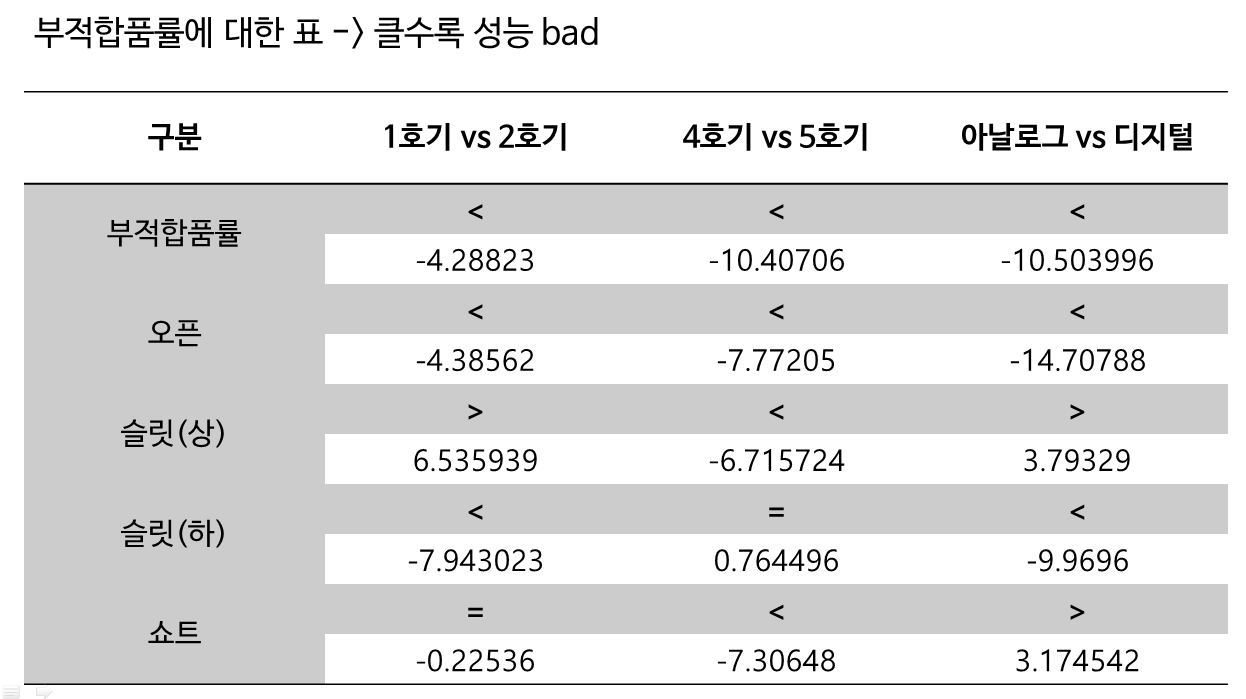

# Particle 데이터 요약에 따른 분포 차 검정

In [254]:
def merge_dates(x):
    date_time = datetime.datetime(2020,int(x["month"]),int(x["day"]),int(x["hour"]),int(x["minute"]))
    return date_time

In [255]:
def merge_columns(tmp_df,date_columns = ["month","day","hour","minute"]):
    time_list = tmp_df[date_columns].apply(lambda x: merge_dates(x), axis = 1)
    tmp_df["Time"] = time_list
    tmp_df = tmp_df.drop(date_columns,axis = 1)
    return tmp_df

In [256]:
def make_plot(df):
    for col in particle_cols:
        sns.lineplot(x = "Time",y = col,data = df)
        plt.show()

In [257]:
def divide_un_over(processed_df,date_time,col_name = "Time"):
    under_df = processed_df[processed_df[col_name] < date_time]
    over_df = processed_df[processed_df[col_name] > date_time]
    return under_df, over_df

In [258]:
light_expose_1

,Location,Time,over_0.3_delta,over_0.5_delta,over_1.0_delta,over_5.0_delta,over_0.3_sigma,over_0.5_sigma,over_1.0_sigma,month,day,weekday,hour,minute,second
0,노광1호기130,2020-04-27 18:02:23,0,0,0,0,0,0,0,4,27,0,18,2,23
1,노광1호기130,2020-04-27 18:03:28,0,0,0,0,0,0,0,4,27,0,18,3,28
2,노광1호기130,2020-04-27 18:04:28,0,0,0,0,0,0,0,4,27,0,18,4,28
3,노광1호기130,2020-04-27 18:05:28,0,0,0,0,0,0,0,4,27,0,18,5,28
4,노광1호기130,2020-04-27 18:06:28,0,0,0,0,0,0,0,4,27,0,18,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25913,노광1호기130,2020-08-11 11:47:38,58,6,0,0,64,6,0,8,11,1,11,47,38
25914,노광1호기130,2020-08-11 11:47:41,41,6,0,0,47,6,0,8,11,1,11,47,41
25915,노광1호기130,2020-08-11 11:47:44,97,32,1,0,130,33,1,8,11,1,11,47,44
25916,노광1호기130,2020-08-11 11:47:45,45,9,0,0,54,9,0,8,11,1,11,47,45


In [259]:
light_expose_1["Time"] = pd.to_datetime(light_expose_1["Time"],format = "%Y.%m.%d %H:%M:%S")
light_expose_2["Time"] = pd.to_datetime(light_expose_2["Time"],format = "%Y.%m.%d %H:%M:%S")
light_expose_4["Time"] = pd.to_datetime(light_expose_4["Time"],format = "%Y.%m.%d %H:%M:%S")
light_expose_5["Time"] = pd.to_datetime(light_expose_5["Time"],format = "%Y.%m.%d %H:%M:%S")

In [260]:
light_expose_1[light_expose_1["over_0.3_sigma"] < 4000]

,Location,Time,over_0.3_delta,over_0.5_delta,over_1.0_delta,over_5.0_delta,over_0.3_sigma,over_0.5_sigma,over_1.0_sigma,month,day,weekday,hour,minute,second
0,노광1호기130,2020-04-27 18:02:23,0,0,0,0,0,0,0,4,27,0,18,2,23
1,노광1호기130,2020-04-27 18:03:28,0,0,0,0,0,0,0,4,27,0,18,3,28
2,노광1호기130,2020-04-27 18:04:28,0,0,0,0,0,0,0,4,27,0,18,4,28
3,노광1호기130,2020-04-27 18:05:28,0,0,0,0,0,0,0,4,27,0,18,5,28
4,노광1호기130,2020-04-27 18:06:28,0,0,0,0,0,0,0,4,27,0,18,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25913,노광1호기130,2020-08-11 11:47:38,58,6,0,0,64,6,0,8,11,1,11,47,38
25914,노광1호기130,2020-08-11 11:47:41,41,6,0,0,47,6,0,8,11,1,11,47,41
25915,노광1호기130,2020-08-11 11:47:44,97,32,1,0,130,33,1,8,11,1,11,47,44
25916,노광1호기130,2020-08-11 11:47:45,45,9,0,0,54,9,0,8,11,1,11,47,45


In [261]:
light_expose_1 = light_expose_1[light_expose_1["over_0.3_sigma"] < 10000]
light_expose_2 = light_expose_2[light_expose_2["over_0.3_sigma"] < 10000]
light_expose_4 = light_expose_4[light_expose_4["over_0.3_sigma"] < 10000]
light_expose_5 = light_expose_5[light_expose_5["over_0.3_sigma"] < 10000]

In [262]:
df_list = [light_expose_1,light_expose_2,light_expose_4,light_expose_5]
not0_df_list = []
only0_df_list = []
for df in df_list:
    not0_df = df[df["over_0.3_sigma"] != 0]
    only0_df = df[df["over_0.3_sigma"] == 0]
    not0_df_list.append(not0_df)
    only0_df_list.append(only0_df)
    print("-"*30)
    print("not0_df's shape :",not0_df.shape)
    print("0s percent :",round((1-not0_df.shape[0]/df.shape[0])*100,5),"%")

------------------------------
not0_df's shape : (1108339, 15)
0s percent : 65.34266 %
------------------------------
not0_df's shape : (338229, 15)
0s percent : 89.30394 %
------------------------------
not0_df's shape : (3057613, 15)
0s percent : 4.45007 %
------------------------------
not0_df's shape : (1913516, 15)
0s percent : 39.23027 %


In [263]:
light_expose_1_not0 = not0_df_list[0]
light_expose_2_not0 = not0_df_list[1]
light_expose_4_not0 = not0_df_list[2]
light_expose_5_not0 = not0_df_list[3]

light_expose_1_only0 = only0_df_list[0]
light_expose_2_only0 = only0_df_list[1]
light_expose_4_only0 = only0_df_list[2]
light_expose_5_only0 = only0_df_list[3]

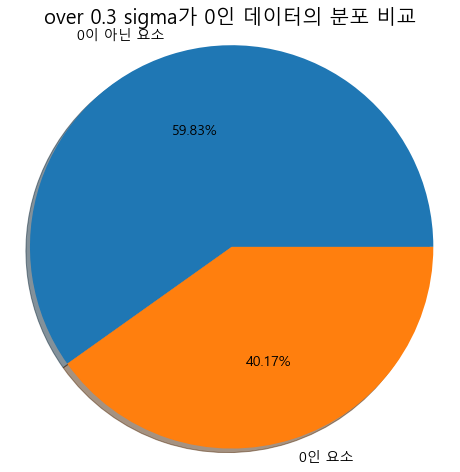

In [264]:
shape_names = ["0이 아닌 요소","0인 요소"]
shape_list = [not0_df.shape[0],light_expose_1.shape[0]-not0_df.shape[0]]
plt.figure(figsize = (8,8))
plt.pie(shape_list,
        labels=shape_names,  
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        textprops={'fontsize': 14}) # text font size
plt.axis('equal') #  equal length of X and Y axis
plt.title("over 0.3 sigma가 0인 데이터의 분포 비교", fontsize=20)
plt.show()

In [265]:
sigma_03_df = light_expose_1[light_expose_1["over_0.3_sigma"] == 0]

In [266]:
tmp_df = pd.DataFrame(sigma_03_df[["Time","over_0.3_sigma","month","day","hour","minute"]].groupby(["month","day","hour","minute"]).count()).reset_index()
merge_tmp = merge_columns(tmp_df)

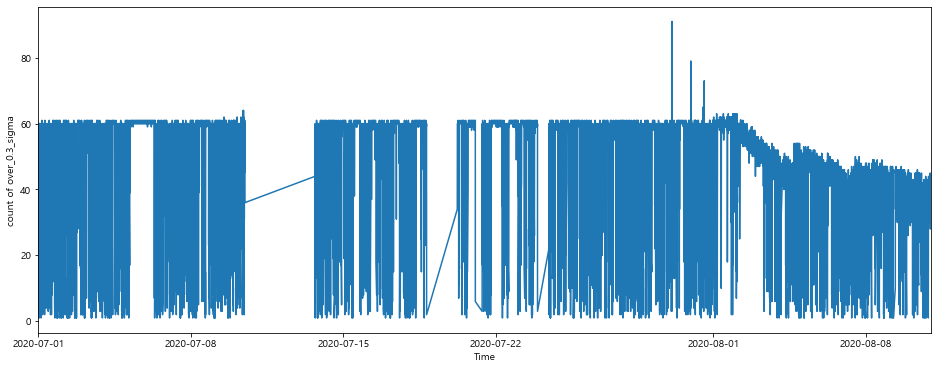

In [267]:
start_date = datetime.datetime(2020,7,1)
end_date = datetime.datetime(2020,8,11)
plt.figure(figsize=(16,6))
sns.lineplot(x = "Time",y ="over_0.3_sigma",data = merge_tmp)
plt.xlim(start_date,end_date)
plt.ylabel("count of over_0.3_sigma")
plt.show()

In [268]:
tmp_df = pd.DataFrame(not0_df[["Time","over_0.3_sigma","month","day","hour","minute"]].groupby(["month","day","hour","minute"]).mean()).reset_index()
merge_tmp = merge_columns(tmp_df)

In [269]:
merge_tmp = merge_tmp[merge_tmp["over_0.3_sigma"] < 2000]

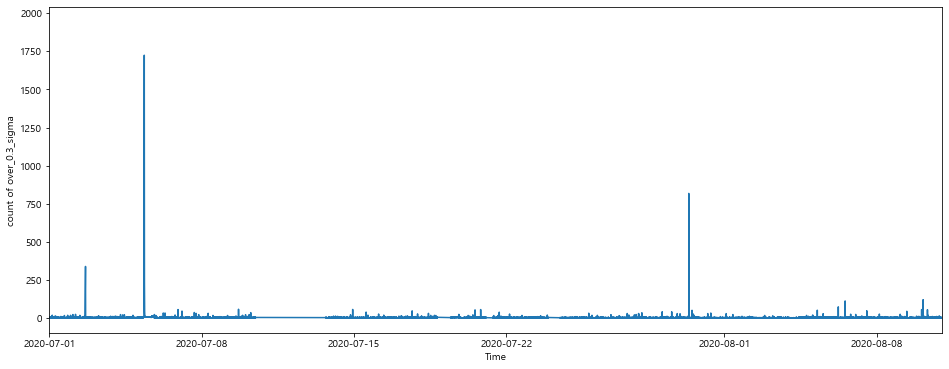

In [270]:
start_date = datetime.datetime(2020,7,1)
end_date = datetime.datetime(2020,8,11)
plt.figure(figsize=(16,6))
sns.lineplot(x = "Time",y ="over_0.3_sigma",data = merge_tmp)
plt.xlim(start_date,end_date)
plt.ylabel("count of over_0.3_sigma")
plt.show()

In [271]:
tmp_df = light_expose_1[light_expose_1["over_0.3_sigma"]<20000]

In [272]:
not0_df = tmp_df[tmp_df["over_0.3_sigma"] != 0]

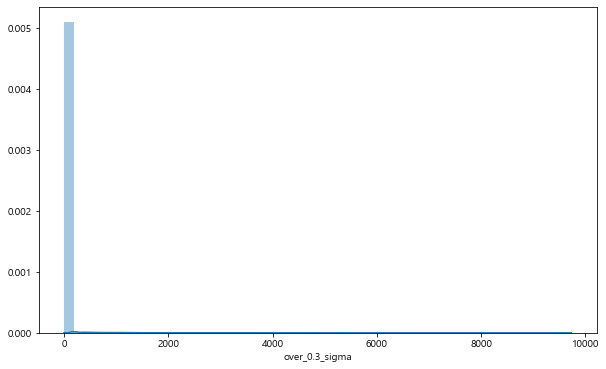

In [273]:
plt.figure(figsize = (10,6))
sns.distplot(tmp_df["over_0.3_sigma"])
plt.show()

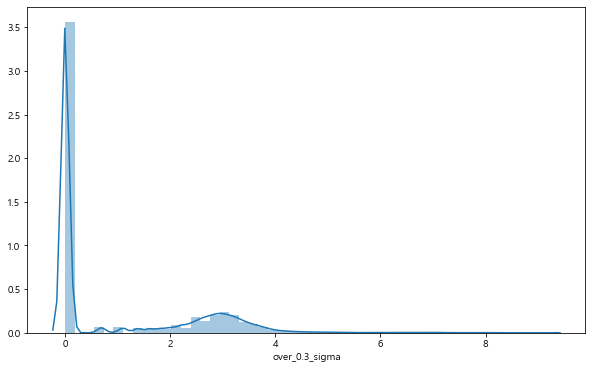

In [274]:
plt.figure(figsize = (10,6))
sns.distplot(np.log(tmp_df["over_0.3_sigma"]+1))
plt.show()

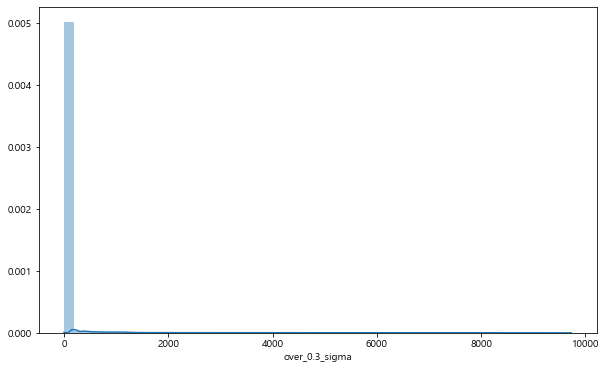

In [275]:
plt.figure(figsize = (10,6))
sns.distplot(not0_df["over_0.3_sigma"])
plt.show()

In [276]:
stats.skew(not0_df["over_0.3_sigma"]) # 왜도

14.10213479865809

In [277]:
stats.kurtosis(not0_df["over_0.3_sigma"]) # 첨도

272.2916137660456

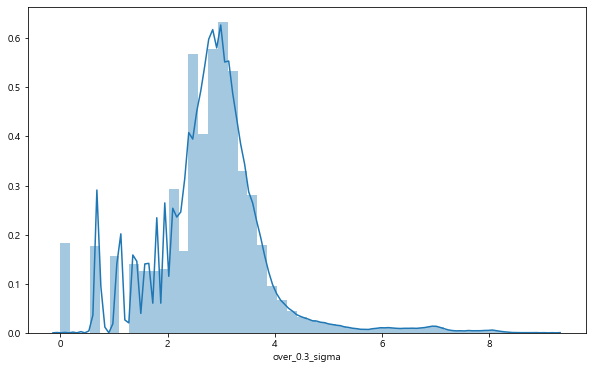

In [278]:
plt.figure(figsize = (10,6))
sns.distplot(np.log(not0_df["over_0.3_sigma"]))
plt.show()

In [279]:
stats.skew(np.log(not0_df["over_0.3_sigma"])) # 왜도

0.4743238691546928

In [280]:
stats.kurtosis(np.log(not0_df["over_0.3_sigma"])) #첨도

3.408103554999082

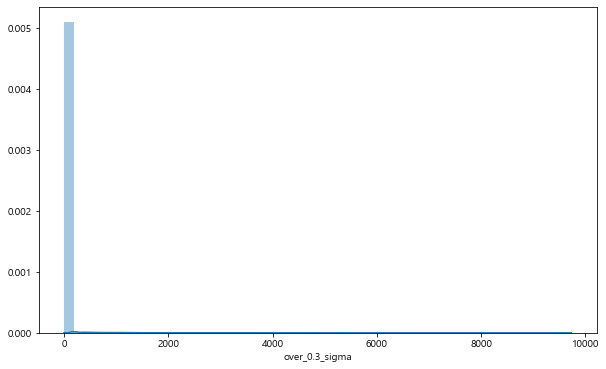

In [281]:
plt.figure(figsize = (10,6))
sns.distplot(light_expose_1["over_0.3_sigma"])
plt.show()

## 노광1호기 Particle 대표값 추출 및 분포비교

* 요약 내용 : min, max, mean, range, 왜도(skew), 첨도(kurtosis)

In [282]:
def get_range(my_list):
    return max(my_list) - min(my_list)

### 요약 단위 : 시간

In [283]:
summary_func_list = ["sum","min","max","mean",get_range,stats.skew,stats.kurtosis]

In [284]:
summary_unit = ["month","day"]
column_list = ["over_0.3_delta","over_0.5_delta","over_1.0_delta","over_5.0_delta","over_0.3_sigma","over_0.5_sigma","over_1.0_sigma"]
grouped_hour_1 = light_expose_1.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_2 = light_expose_2.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_4 = light_expose_4.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_5 = light_expose_5.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()

In [285]:
column_list = list(map(lambda x: "_".join(x),grouped_hour_1.columns))
grouped_hour_1.columns = column_list
grouped_hour_2.columns = column_list
grouped_hour_4.columns = column_list
grouped_hour_5.columns = column_list

In [286]:
def merge_dates_by_day(x):
    date_time = datetime.datetime(2020,int(x["month_"]),int(x["day_"]))
    return date_time

In [287]:
def merge_columns_by_day(tmp_df,date_columns = ["month_","day_",]):
    time_list = tmp_df[date_columns].apply(lambda x: merge_dates_by_day(x), axis = 1)
    tmp_df["Time"] = time_list
    tmp_df = tmp_df.drop(date_columns,axis = 1)
    return tmp_df

In [288]:
grouped_hour_1

,month_,day_,over_0.3_delta_sum,over_0.3_delta_min,over_0.3_delta_max,over_0.3_delta_mean,over_0.3_delta_get_range,over_0.3_delta_skew,over_0.3_delta_kurtosis,over_0.5_delta_sum,...,over_0.5_sigma_get_range,over_0.5_sigma_skew,over_0.5_sigma_kurtosis,over_1.0_sigma_sum,over_1.0_sigma_min,over_1.0_sigma_max,over_1.0_sigma_mean,over_1.0_sigma_get_range,over_1.0_sigma_skew,over_1.0_sigma_kurtosis
0,4,27,12122,0,4638,64.137566,4638,12.167056,156.554221,4851,...,3216,12.671703,165.713361,1735,0,730,9.179894,730,12.099480,155.022856
1,4,28,31014,0,1120,51.262810,1120,4.281867,18.206673,10196,...,507,4.308930,19.225041,2663,0,151,4.401653,151,5.045499,34.122101
2,4,29,158282,0,4844,109.918056,4844,7.481669,74.545969,54554,...,2235,8.051963,83.796111,8826,0,345,6.129167,345,7.846317,78.182616
3,4,30,161981,0,2695,112.408744,2695,3.279303,13.069227,53876,...,2388,6.569919,79.567078,9905,0,1186,6.873699,1186,23.285399,678.290831
4,5,1,147383,0,1291,102.349306,1291,2.175536,3.628434,48623,...,787,2.722280,9.025303,9003,0,419,6.252083,419,10.134830,180.906275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,8,7,557781,0,656,8.878894,656,5.340200,118.861438,111723,...,1034,101.332369,17627.653978,11746,0,511,0.186976,511,185.749084,40001.576576
99,8,8,328453,0,382,5.365739,382,3.645613,45.854466,65488,...,246,23.226610,1451.183580,6589,0,111,0.107641,111,76.919546,9492.678113
100,8,9,805230,0,392,13.788657,392,3.712529,13.993645,167686,...,292,4.727423,46.832010,12833,0,74,0.219751,74,23.463005,1497.506056
101,8,10,181302,0,1089,3.350248,1089,41.121682,4184.663655,42486,...,1592,153.568073,28004.970021,6462,0,617,0.119410,617,182.719081,36947.880472


In [289]:
grouped_hour_1 = merge_columns_by_day(grouped_hour_1)
grouped_hour_2 = merge_columns_by_day(grouped_hour_2)
grouped_hour_4 = merge_columns_by_day(grouped_hour_4)
grouped_hour_5 = merge_columns_by_day(grouped_hour_5)

In [290]:
grouped_hour_1.to_csv("./preprocessed/group_by/grouped_hour_1.csv",index = False, encoding = "euc-kr")
grouped_hour_2.to_csv("./preprocessed/group_by/grouped_hour_2.csv",index = False, encoding = "euc-kr")
grouped_hour_4.to_csv("./preprocessed/group_by/grouped_hour_4.csv",index = False, encoding = "euc-kr")
grouped_hour_5.to_csv("./preprocessed/group_by/grouped_hour_5.csv",index = False, encoding = "euc-kr")

### 요약 단위 : 시간

#### 0.3 sigma 가 0인 데이터 포함

summary_unit = ["month","day","hour"]
column_list = ["over_0.3_delta","over_0.5_delta","over_1.0_delta","over_5.0_delta","over_0.3_sigma","over_0.5_sigma","over_1.0_sigma"]
grouped_hour_1 = light_expose_1.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_2 = light_expose_2.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_4 = light_expose_4.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_5 = light_expose_5.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()

column_list = list(map(lambda x: "_".join(x),grouped_hour_1.columns))
grouped_hour_1.columns = column_list
grouped_hour_2.columns = column_list
grouped_hour_4.columns = column_list
grouped_hour_5.columns = column_list

#### 0.3 sigma 가 0인 데이터 제외

summary_unit = ["month","day","hour"]
column_list = ["over_0.3_delta","over_0.5_delta","over_1.0_delta","over_5.0_delta","over_0.3_sigma","over_0.5_sigma","over_1.0_sigma"]
grouped_hour_1_not0 = light_expose_1_not0.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_2_not0 = light_expose_2_not0.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_4_not0 = light_expose_4_not0.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()
grouped_hour_5_not0 = light_expose_5_not0.groupby(summary_unit)[column_list].agg(summary_func_list).reset_index()

column_list = list(map(lambda x: "_".join(x),grouped_hour_1_not0.columns))
grouped_hour_1_not0.columns = column_list
grouped_hour_2_not0.columns = column_list
grouped_hour_4_not0.columns = column_list
grouped_hour_5_not0.columns = column_list

grouped_1.to_csv("./preprocessed/group_by/grouped_minute_1.csv")
grouped_2.to_csv("./preprocessed/group_by/grouped_minute_2.csv")
grouped_4.to_csv("./preprocessed/group_by/grouped_minute_4.csv")
grouped_5.to_csv("./preprocessed/group_by/grouped_minute_5.csv")
grouped_minute_1.to_csv("./preprocessed/group_by/grouped_minute_1_not0.csv")
grouped_minute_2.to_csv("./preprocessed/group_by/grouped_minute_2_not0.csv")
grouped_minute_4.to_csv("./preprocessed/group_by/grouped_minute_4_not0.csv")
grouped_minute_5.to_csv("./preprocessed/group_by/grouped_minute_5_not0.csv")
grouped_hour_1.to_csv("./preprocessed/group_by/grouped_hour_1.csv")
grouped_hour_2.to_csv("./preprocessed/group_by/grouped_hour_2.csv")
grouped_hour_4.to_csv("./preprocessed/group_by/grouped_hour_4.csv")
grouped_hour_5.to_csv("./preprocessed/group_by/grouped_hour_5.csv")
grouped_hour_1_not0.to_csv("./preprocessed/group_by/grouped_hour_1_not0.csv")
grouped_hour_2_not0.to_csv("./preprocessed/group_by/grouped_hour_2_not0.csv")
grouped_hour_4_not0.to_csv("./preprocessed/group_by/grouped_hour_4_not0.csv")
grouped_hour_5_not0.to_csv("./preprocessed/group_by/grouped_hour_5_not0.csv")

In [291]:
grouped_hour_1 = pd.read_csv("./preprocessed/group_by/grouped_hour_1.csv")
grouped_hour_2 = pd.read_csv("./preprocessed/group_by/grouped_hour_2.csv")
grouped_hour_4 = pd.read_csv("./preprocessed/group_by/grouped_hour_4.csv")
grouped_hour_5 = pd.read_csv("./preprocessed/group_by/grouped_hour_5.csv")

#  기타 시각화

In [292]:
grouped_hour_1.columns

Index(['over_0.3_delta_sum', 'over_0.3_delta_min', 'over_0.3_delta_max',
       'over_0.3_delta_mean', 'over_0.3_delta_get_range',
       'over_0.3_delta_skew', 'over_0.3_delta_kurtosis', 'over_0.5_delta_sum',
       'over_0.5_delta_min', 'over_0.5_delta_max', 'over_0.5_delta_mean',
       'over_0.5_delta_get_range', 'over_0.5_delta_skew',
       'over_0.5_delta_kurtosis', 'over_1.0_delta_sum', 'over_1.0_delta_min',
       'over_1.0_delta_max', 'over_1.0_delta_mean', 'over_1.0_delta_get_range',
       'over_1.0_delta_skew', 'over_1.0_delta_kurtosis', 'over_5.0_delta_sum',
       'over_5.0_delta_min', 'over_5.0_delta_max', 'over_5.0_delta_mean',
       'over_5.0_delta_get_range', 'over_5.0_delta_skew',
       'over_5.0_delta_kurtosis', 'over_0.3_sigma_sum', 'over_0.3_sigma_min',
       'over_0.3_sigma_max', 'over_0.3_sigma_mean', 'over_0.3_sigma_get_range',
       'over_0.3_sigma_skew', 'over_0.3_sigma_kurtosis', 'over_0.5_sigma_sum',
       'over_0.5_sigma_min', 'over_0.5_sigma_max', '

In [293]:
x1 = np.log(grouped_hour_1["over_0.5_sigma_max"]+1)
x2 = np.log(defect_1["defect_from_light"]+1)
scipy.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.8266421761567393, pvalue=0.0)

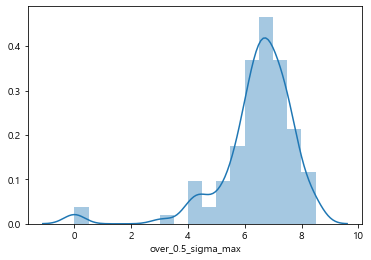

In [294]:
sns.distplot(np.log(grouped_hour_1["over_0.5_sigma_max"]+1))
plt.show()

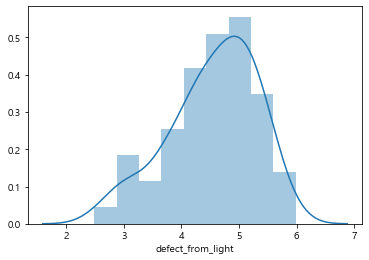

In [295]:
sns.distplot(np.log(defect_1["defect_from_light"]+1))
plt.show()

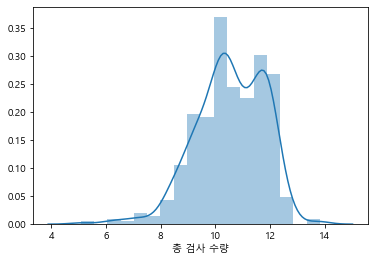

In [296]:
sns.distplot(np.log(defect_concat["총 검사 수량"]))
plt.show()

In [297]:
def defect_plot(df1,df2,df3,df4,col_name = "pure_yield",data_name = ["노광1호기","노광2호기","노광4호기","노광5호기"]):
    data_list = [df1[col_name],df2[col_name],df3[col_name],df4[col_name]]
    plt.figure(figsize = (14,6))
    plt.boxplot(data_list)
    plt.title(f"각 호기 별 '{col_name}' boxtplot", size = 18)
    plt.xticks(ticks = [1,2,3,4],labels = data_name)
    plt.show()

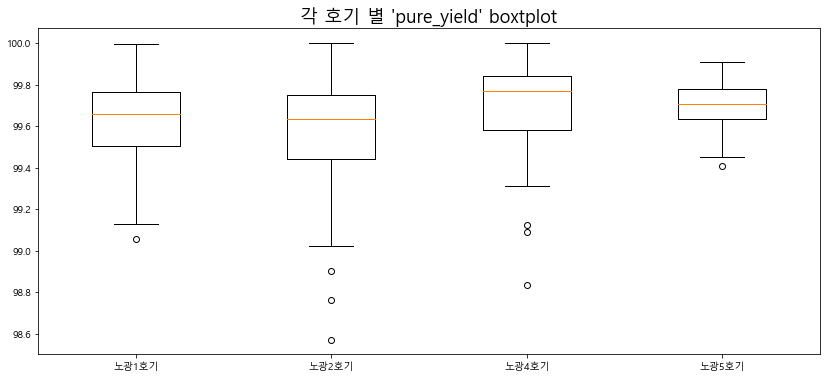

In [298]:
defect_plot(defect_1,defect_2,defect_4,defect_5)

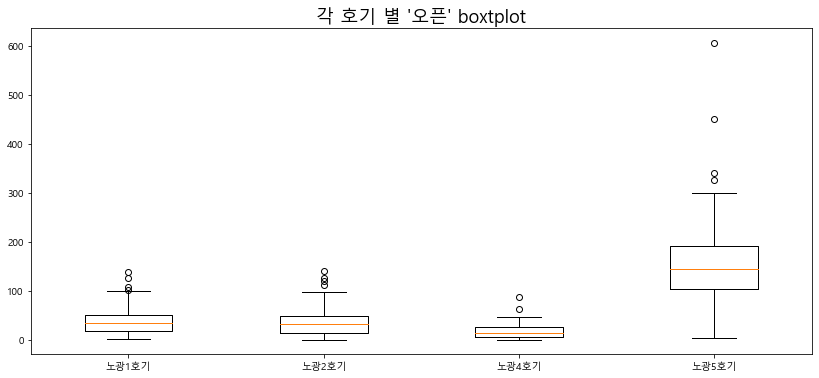

In [299]:
defect_plot(defect_1,defect_2,defect_4,defect_5,col_name = "오픈")

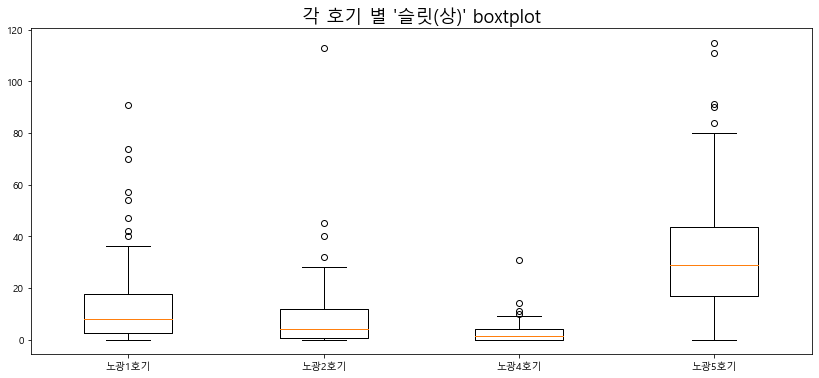

In [300]:
defect_plot(defect_1,defect_2,defect_4,defect_5,col_name = "슬릿(상)")

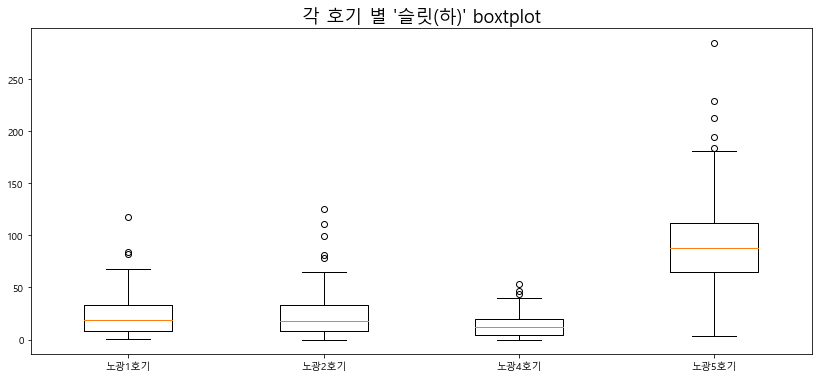

In [301]:
defect_plot(defect_1,defect_2,defect_4,defect_5,col_name = "슬릿(하)")

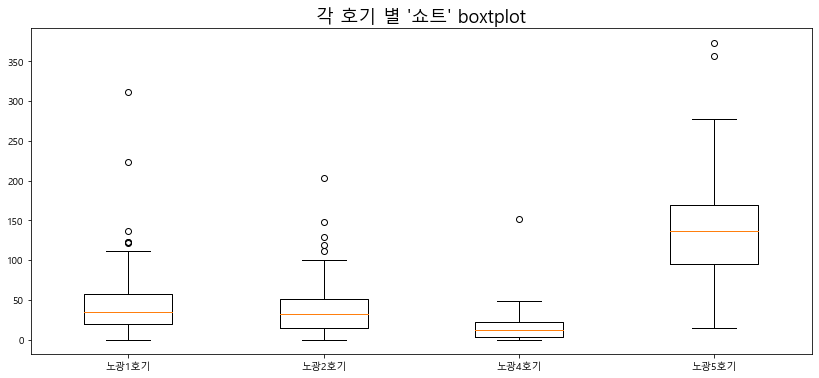

In [302]:
defect_plot(defect_1,defect_2,defect_4,defect_5,col_name = "쇼트")

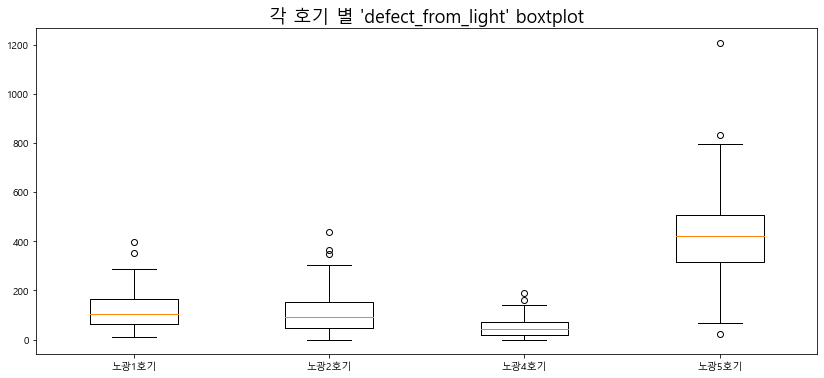

In [303]:
defect_plot(defect_1,defect_2,defect_4,defect_5,col_name = "defect_from_light")

In [304]:
day_list = []
start = datetime.datetime.strptime("2020.04.01","%Y.%m.%d")
end = datetime.datetime.strptime("2020.08.23","%Y.%m.%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
for date in date_generated:
    day_list.append(date.strftime("%Y%m%d"))

In [305]:
empt_day = []
for day in date_generated:
    if day not in list(defect_1["일자"]):
        empt_day.append(day.strftime("%Y%m%d"))

In [306]:
def plot_pie_chart(df,df_name = 1):
    reason_names = ["오픈","슬릿(상)","슬릿(하)","쇼트"]
    reason_count = list(df[reason_names].sum())
    plt.figure(figsize = (8,8))
    plt.pie(reason_count,
           labels=reason_names,  
            autopct='%1.2f%%', # second decimal place
            shadow=True, 
            textprops={'fontsize': 14}) # text font size
    plt.axis('equal') #  equal length of X and Y axis
    plt.title("노광" + str(df_name) + "호기" + '불량 요인', fontsize=20)
    plt.show()

In [307]:
defect_1

,일자,총 검사 수량,총 불량 수량,오픈,슬릿(상),슬릿(하),쇼트,Yield(%),defect_from_light,pure_yield,mach_num
0,2020-04-01,10368.0,65.0,11.000448,0.995328,6.998400,2.001024,99.37,20.995200,99.7975,1
3,2020-04-04,39636.0,221.0,8.006472,4.003236,12.009708,17.003844,99.44,41.023260,99.8965,1
21,2020-04-22,10696.0,161.0,10.995488,0.994728,6.995184,4.995032,98.49,23.980432,99.7758,1
22,2020-04-23,10752.0,160.0,6.999552,0.000000,14.999040,20.998656,98.51,42.997248,99.6001,1
23,2020-04-24,16128.0,285.0,6.999552,5.999616,6.999552,15.998976,98.23,35.997696,99.7768,1
...,...,...,...,...,...,...,...,...,...,...,...
140,2020-08-19,21224.0,1279.0,17.000424,40.007240,33.003320,60.000248,93.97,150.011232,99.2932,1
141,2020-08-20,62976.0,1220.0,56.993280,73.996800,55.985664,46.980096,98.06,233.955840,99.6285,1
142,2020-08-21,69840.0,1170.0,40.996080,16.971120,44.976960,91.001520,98.32,193.945680,99.7223,1
143,2020-08-22,36032.0,725.0,31.996416,6.990208,19.997760,43.995072,97.99,102.979456,99.7142,1


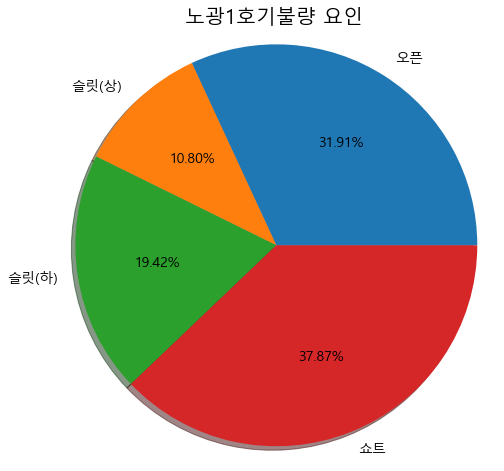

In [308]:
plot_pie_chart(defect_1,1)

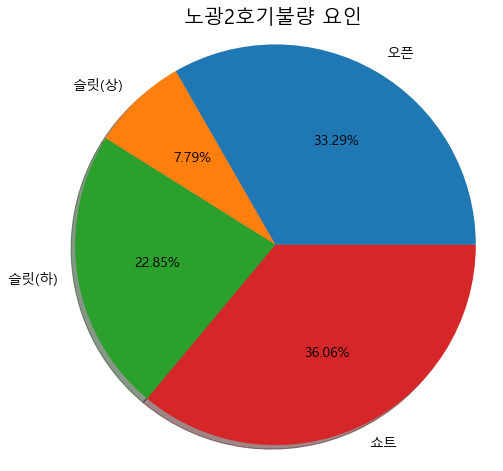

In [309]:
plot_pie_chart(defect_2,2)

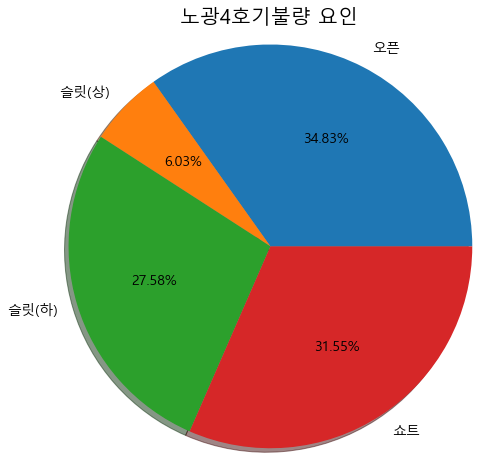

In [310]:
plot_pie_chart(defect_4,4)

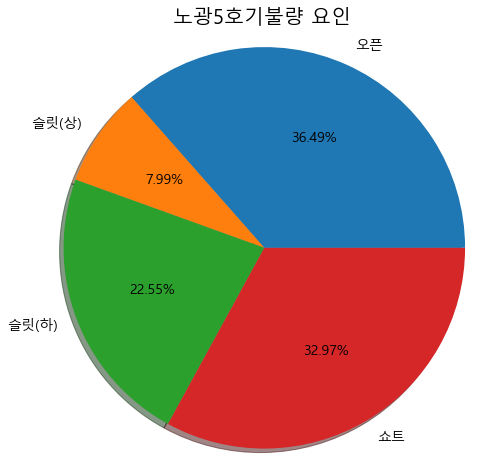

In [311]:
plot_pie_chart(defect_5,5)

ppm_to_count = $${ppm  \over 1,000,000}\times (총 검사 수량)$$

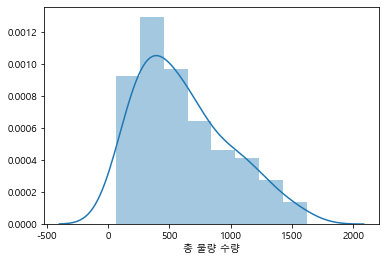

In [312]:
sns.distplot(defect_1["총 불량 수량"])
plt.show()

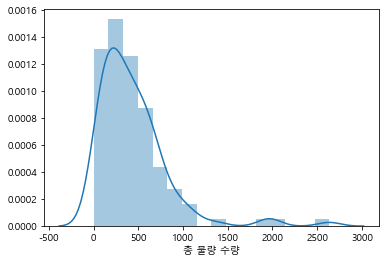

In [313]:
sns.distplot(defect_2["총 불량 수량"])
plt.show()

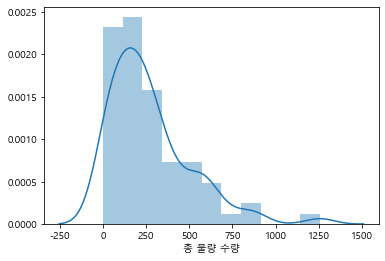

In [314]:
sns.distplot(defect_4["총 불량 수량"])
plt.show()

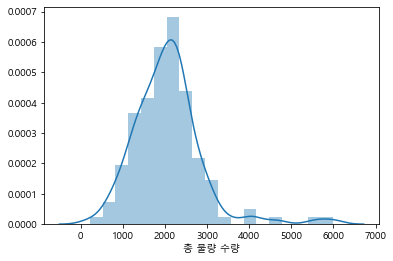

In [315]:
sns.distplot(defect_5["총 불량 수량"])
plt.show()

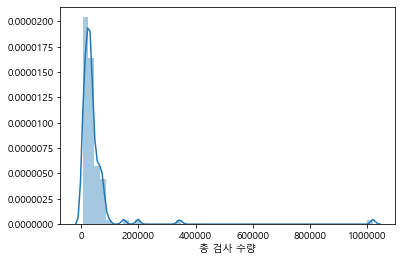

In [316]:
sns.distplot(defect_1["총 검사 수량"])
plt.show()

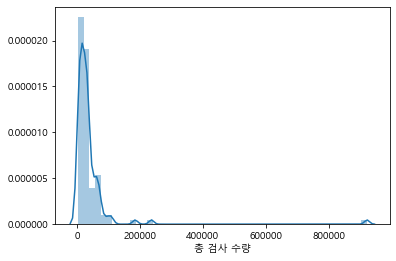

In [317]:
sns.distplot(defect_2["총 검사 수량"])
plt.show()

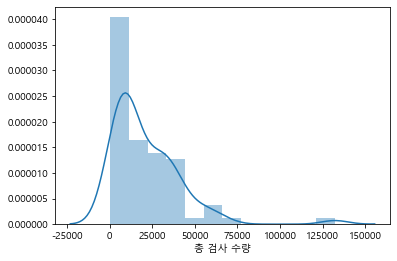

In [318]:
sns.distplot(defect_4["총 검사 수량"])
plt.show()

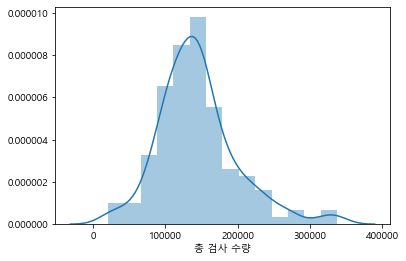

In [319]:
sns.distplot(defect_5["총 검사 수량"])
plt.show()

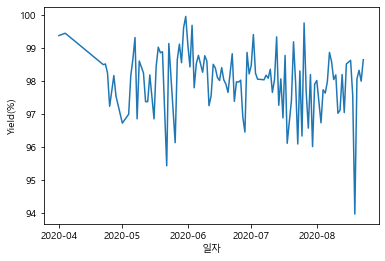

In [320]:
sns.lineplot(x = "일자",y = "Yield(%)",data = defect_1)
plt.show()

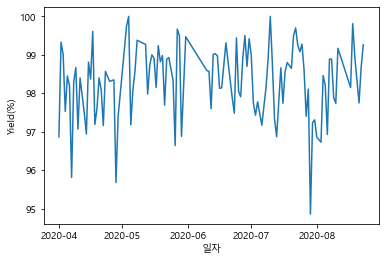

In [321]:
sns.lineplot(x = "일자",y = "Yield(%)",data = defect_2)
plt.show()

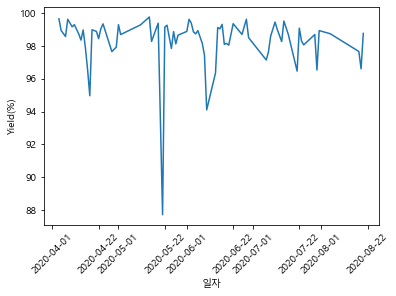

In [322]:
sns.lineplot(x = "일자",y = "Yield(%)",data = defect_4)
plt.xticks(rotation = 45)
plt.show()

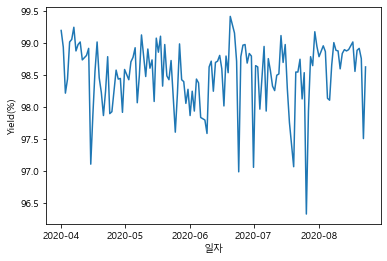

In [323]:
sns.lineplot(x = "일자",y = "Yield(%)",data = defect_5)
plt.show()

In [324]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = "총 검사 수량",y = "총 불량 수량", data = tmp_df)
plt.title("노광 1호기",size = 18)
plt.show()

ValueError: Could not interpret input '총 검사 수량'

<Figure size 1152x432 with 0 Axes>

In [ ]:
tmp_df = defect_2[defect_2["총 검사 수량"] < 60000]
plt.figure(figsize = (16,6))
sns.regplot(x = "총 검사 수량",y = "총 불량 수량", data = tmp_df)
plt.title("노광 2호기",size = 18)
plt.show()

In [ ]:
plt.figure(figsize = (16,6))
sns.regplot(x = "총 검사 수량",y = "총 불량 수량", data = defect_4)
plt.show()

In [ ]:
plt.figure(figsize = (16,6))
sns.regplot(x = "총 검사 수량",y = "총 불량 수량", data = defect_5)
plt.show()

In [ ]:
sns.boxplot(defect_5["Yield(%)"])
plt.show()

In [ ]:
particle_cols = ["over_0.3_delta","over_0.5_delta","over_1.0_delta","over_5.0_delta","over_0.3_sigma","over_0.5_sigma","over_1.0_sigma"]

In [ ]:
covered = light_expose_1[light_expose_1["over_0.5_sigma"] < 15000]

In [ ]:
covered.head()

In [ ]:
tmp_df = covered.groupby(["month","day","hour","minute"])[particle_cols].mean().reset_index()

In [ ]:
merged_expose_1 = merge_columns(tmp_df)

In [ ]:
defect_1.head()

In [ ]:
plt.figure(figsize = (16,6))
sns.lineplot(x='Time', y='over_0.5_sigma', data=merged_expose_1, color='orange',linestyle = '--')
plt.show()

In [ ]:
defect_1["불량률"] = defect_1["총 불량 수량"] / defect_1["총 검사 수량"]

In [ ]:
split_date = datetime.datetime(2020,7,1)
_,over_df = divide_un_over(merged_expose_1,split_date,"Time")

In [ ]:
over_df = over_df[over_df["over_0.5_sigma"] < 98]

In [ ]:
_,defect_over_7_df = divide_un_over(defect_1,split_date,"일자")

In [ ]:
split_date_8 = datetime.datetime(2020,8,12)
defect_target_df,_ = divide_un_over(defect_over_7_df,split_date_8,"일자")

In [ ]:
fig,ax = plt.subplots(figsize = (16,6))
sns.lineplot(x='일자', y='불량률', data=defect_target_df, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Time', y='over_0.5_sigma', data=over_df, ax=ax2, color='orange',linestyle = '--')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize = (16,6))
sns.lineplot(x='일자', y='오픈', data=defect_target_df, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Time', y='over_0.5_sigma', data=over_df, ax=ax2, color='orange',linestyle = '--')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize = (16,6))
sns.lineplot(x='일자', y='쇼트', data=defect_target_df, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Time', y='over_0.5_sigma', data=over_df, ax=ax2, color='orange',linestyle = '--')
plt.show()

In [ ]:
sns.lineplot(x = "hour",y = "over_0.3_sigma",data = light_expose_1_only0.groupby(["hour"])["over_0.3_sigma"].count().reset_index())
plt.show()